In [73]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
report_path = "/home/nicolasjudd/school_notes/neural/final_report/"
img_path = os.path.join(report_path, 'img')

In [106]:
def plot_normalized_response(uinits, ress):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    _ = [ax[0].plot(u, label=f"Peak={max(u)}") for u in uinits]
    _ = ax[0].set_title(f"Input: Len->{np.sum(uinits[0]>0)}")

    _ = ax[1].set_title("Normalized U Immediate Response")
    _ = ax[2].set_title("Normalized V Immediate Response")
    for res, uinit in zip(ress, uinits):
        udata = res.u[-1]
        zu_data = udata  # (udata - np.average(udata))/np.std(udata)

        vdata = res.v[-1]
        zv_data = vdata   # (vdata - np.average(vdata))/np.std(vdata)
        x_rang = np.linspace(-zu_data.size//2, zu_data.size//2, zu_data.size)
        
        _ = ax[1].plot(x_rang, zu_data, label=f"Normalized U Immediate Response <- Uinit Peak:{max(res.u[1])}")
        _ = ax[2].plot(x_rang, zv_data, label=f"Normalized V Immediate Response <- Uinit Peak:{max(res.v[1])}")
    
    return fig, ax
    # plt.legend()

In [76]:
def make_s_func(l):
    def s(x):
        return (1/(1 + np.exp(-(x+l/2)/(0.25)))*(1 - 1/(1 + np.exp(-(x-l/2)/(0.25)))))
    return s

In [119]:
# def make_input(intensity, exp, off):
#     u = np.zeros(param.size).reshape((param.size,1))
#     v = np.zeros(param.size).reshape((param.size, 1))
    
#     ii = param.size//2
#     u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
#     return (u, v)


# def make_current(intensity, ss):
#     s = make_s_func(l)
    
#     t1 = -intensity*1.25 * s(np.arange(-param.size//2, param.size//2)).reshape((param.size,1))
#     t2 = -intensity*0.4 * s(np.arange(-param.size//2, param.size//2)).reshape((param.size,1))
    
#     t1 = np.min(np.array((t1, -ss*np.ones_like(t1))), axis=0)
#     t2 = np.min(np.array((t2, -ss*np.ones_like(t2))), axis=0)

#     # ii = param.size//2
#     # u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
#     # u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
#     return np.array((t1, t2))


def make_current(intensity, Θ):
    
    t1 = intensity*Θ[0] 
    t2 = intensity*Θ[1]

    return np.array((t1, t2))

In [474]:
τ = 0.1
τe = 1
τi = τ * τe

σ = 0.1 # 7.6625  # .6625
σe = 1
σi = σ* σe


n = 3
k = 0.8


A=np.array([[1, 1.5], [1, 0.25]])
Θ=np.array([0.001, 1.8])


param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=n, k=k
                             , size = 2**9+1, σ=np.array([σe,σi]), A=A, Θ=Θ )

intensities = np.linspace(0.01, 2, 20)
currents = [make_current(i, Θ) for i in intensities]
uinits = [u * np.ones(param.size).reshape((param.size,1)) for (u, _) in currents]


# inp = make_input(30, 4, 0)

ress = list()
for ix, cur in enumerate(currents):
    print(ix)
    param.Θ = cur
    # print(param.Θ)
    u = 0*np.ones(param.size).reshape((param.size,1))
    v = 0*np.ones(param.size).reshape((param.size, 1)) 
    u[:] = 2
    
    inp = (u,v)
    trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)

    end = 5
    step = 1/15
    res = trv_wav((0, end))

    # print(res._solved.message)
    ress.append(res)

# ress = list()
# for inp in inps:
#     trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)

#     end = 50
#     step = 1/15
#     res = trv_wav((0, end), t_eval=np.arange(0, end, step))

#     # print(res._solved.message)
#     ress.append(res)


# fig = plt.figure()
# _ = plt.imshow(res.u.T, vmin=0, vmax=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [475]:
out_us = [res.u[-1][param.size//2] for res in ress]

In [476]:
u_inits = [cur[0] for cur in currents]

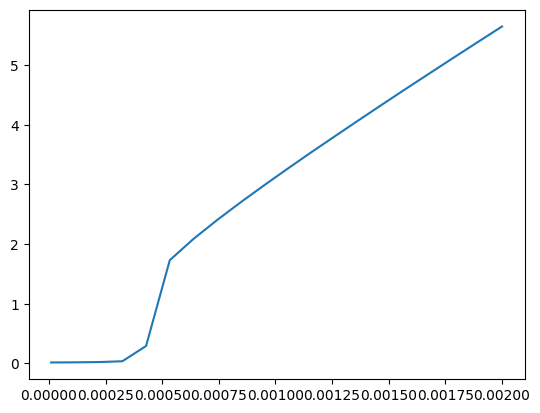

In [477]:
plt.plot(u_inits, out_us)
# plt.xscale('log')
# plt.yscale('log')

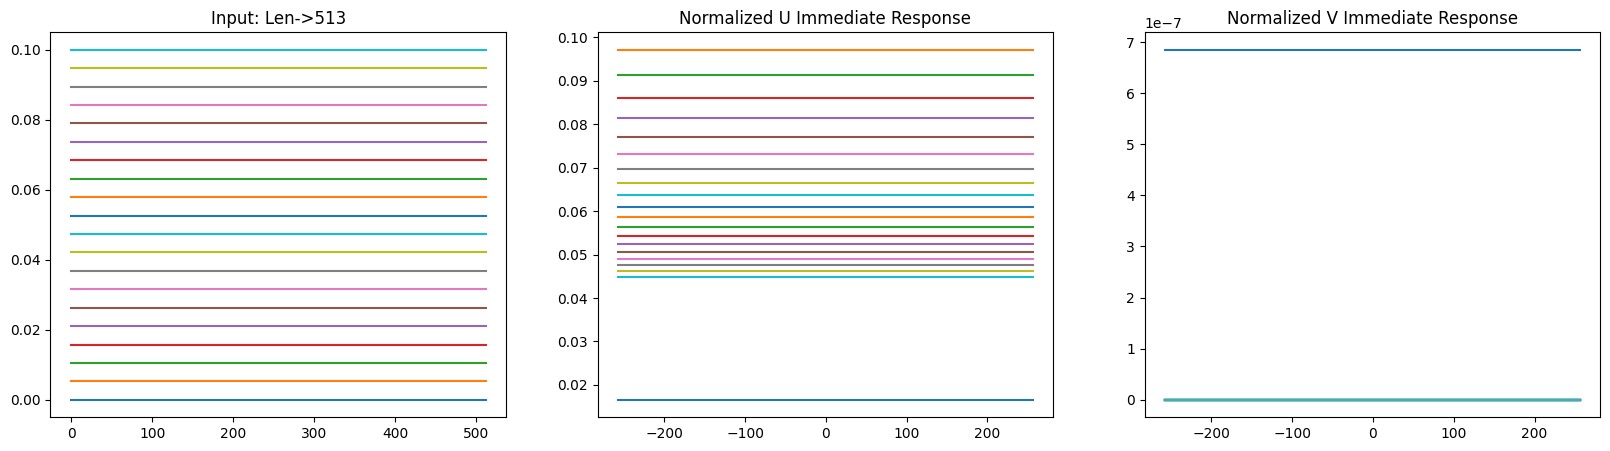

In [211]:
fig, ax = plot_normalized_response(uinits, ress)
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_normalized_graph.png')
#             ,bbox_inches='tight')

In [510]:
τ = 1
τe = 1
τi = τ * τe

σ = 0.35# 7.6625  # .6625
σe = 1
σi = σ* σe


n = 3
k = 0.8


A=np.array([[1, 1.5], [1, 0.25]])
Θ=np.array([0.001, 1.8])


param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=n, k=k
                             , size = 2**9+1, σ=np.array([σe,σi]), A=A, Θ=Θ )

u = np.zeros(param.size).reshape((param.size,1))
v = np.zeros(param.size).reshape((param.size, 1))

u[0:2**5] = 2
v[0:2**8] = 0

inp = (u,v)



trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)

end = 50
step = 1/15
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

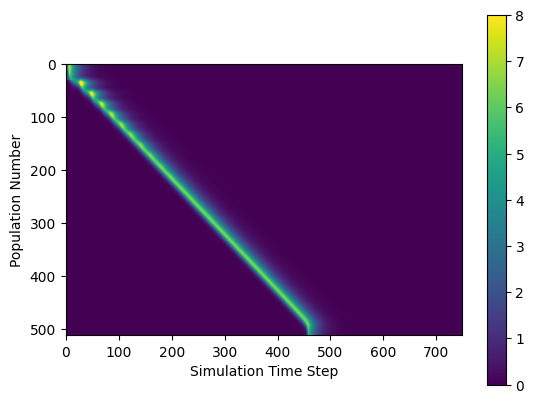

In [511]:
fig = plt.figure()  #(figsize=(16,4))

_ = plt.imshow(res.u.T, vmin = 0, vmax=8)
_ = plt.colorbar()

_ = plt.xlabel("Simulation Time Step")
_ = plt.ylabel("Population Number")

# plt.savefig(os.path.join(img_path,f'newparam_ssn_sig={σ}_tau={τ}_HC.png'))

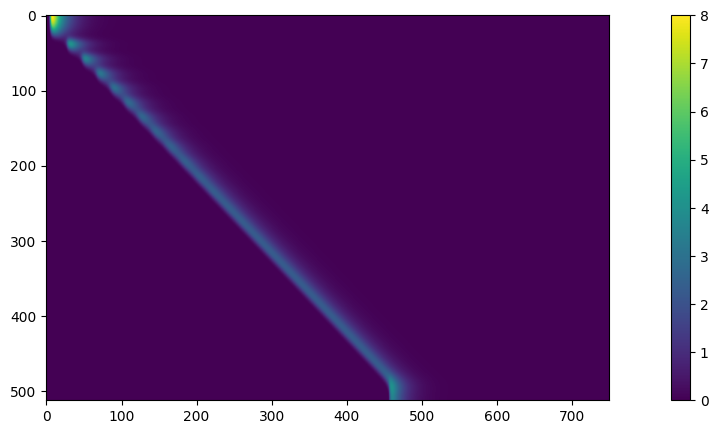

In [512]:
fig = plt.figure(figsize=(16,5))
_ = plt.imshow(res.v.T, vmin = 0, vmax=8)
_ = plt.colorbar()

In [469]:
3# gen = zip(uinits, ress)

3

In [98]:
# u, r = next(gen)
# plot_normalized_response(u, r)

In [99]:
# data = np.average(res.u, axis=0)
# zdata = (data - np.average(data))/np.std(data)
# _ = plt.plot(zdata)


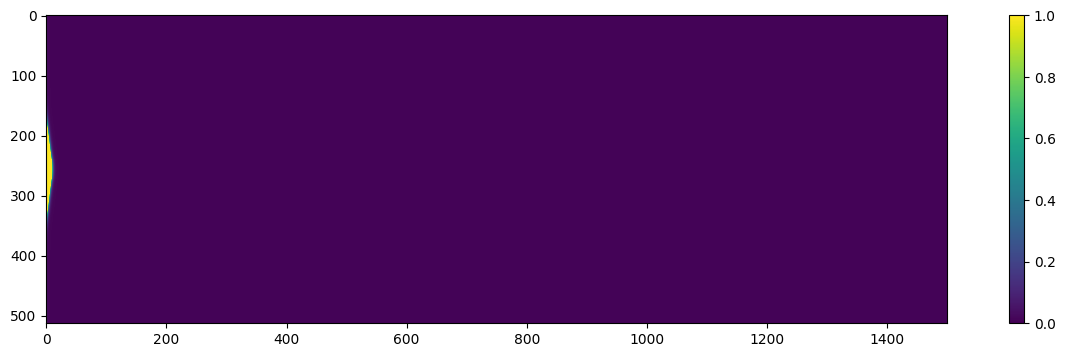

In [100]:
fig = plt.figure(figsize=(16,4))
_ = plt.imshow(ress[0].u.T, vmin = 0, vmax=1)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

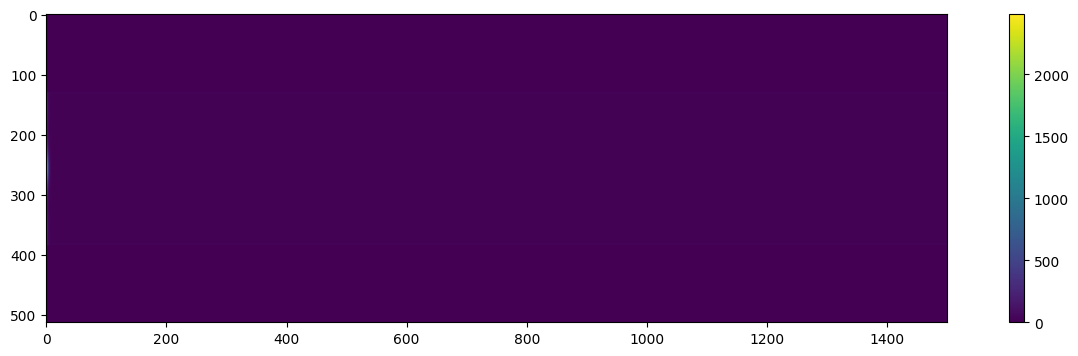

In [89]:
fig = plt.figure(figsize=(16,4))
_ = plt.imshow(ress[9].v.T, vmin=0)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

In [415]:
_ = plt.plot(res.t, res.u[:, param.size])

IndexError: index 513 is out of bounds for axis 1 with size 513